# HW5 Assignment 3
## Writer: ChunChieh, Tsai (cct367)

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

## 0. Import Library

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline
import seaborn as sns
import requests
from bs4 import BeautifulSoup


## 1. Download Data from 3 sources

In [26]:
def download(filename):
    os.system("curl -O https://raw.githubusercontent.com/DishT/PUI2017_cct367/master/HW5_cct367/data/"+ filename)
    os.system("mv "+ filename+ " " + os.getenv("PUIDATA"))
file = ["Firearm.csv", "data-pvLFI.csv", "pop.csv", "gdp.csv"]
for i in file:
    download(i)
print("Download completely! :D Enjoy~")


Download completely! :D Enjoy~


### 1.1 Data From Google Sheet

In [27]:
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "Firearm.csv")
df_1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [28]:
df_1.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [29]:
df_1.drop(['ISO code', 'Source','% of homicides by firearm','Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership'],axis = 1, inplace =True)
df_1.head()

,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms
0,Albania,56.0,8.6,270000.0
1,Algeria,20.0,7.6,1900000.0
2,Angola,NaN,17.3,2800000.0
3,Anguilla,1.0,NaN,NaN
4,Argentina,1198.0,10.2,3950000.0


### 1.2 Data Number of mass shootings 

In [30]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "data-pvLFI.csv")
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


### 1.3 The world population by country

In [31]:
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + "pop.csv")
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [32]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [33]:
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2016', '2013',
       '2014', '2015', 'Unnamed: 61'], axis=1, inplace = True)

In [34]:
df3.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [35]:
df4 = pd.read_csv(os.getenv("PUIDATA") +  "/" + "gdp.csv")

df4 = pd.DataFrame([df4["Country Name"],df4["2012"]]).T
df4.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.05365e+10
2,Angola,1.15398e+11
3,Albania,1.23198e+10
4,Andorra,3.14615e+09


## 2. Drop the irrelavant Data


## 3. Merge data by key value "country"

In [36]:
df = df2.merge(df3, right_on="Country Name", left_on="Country")
df = df.merge(df_1, right_on="Country/Territory", left_on="Country")
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name,2012,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,Australia,22728254.0,Australia,30.0,15.0,3050000.0
1,Austria,30.4,1,Austria,8429991.0,Austria,18.0,30.4,2500000.0
2,Canada,30.8,4,Canada,34750545.0,Canada,173.0,30.8,9950000.0
3,Denmark,12.0,0,Denmark,5591572.0,Denmark,15.0,12.0,650000.0
4,Finland,45.3,2,Finland,5413971.0,Finland,24.0,45.3,2400000.0


In [40]:
df = df.merge(df4, right_on="Country Name", left_on="Country")
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country Name_x,2012_x,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name_y,2012_y,Country Name,2012
0,Australia,15.0,4,Australia,22728254.0,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,Australia,1.53819e+12
1,Austria,30.4,1,Austria,8429991.0,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,Austria,4.07452e+11
2,Canada,30.8,4,Canada,34750545.0,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,Canada,1.82429e+12


In [41]:
df["gdp"] = df["2012_y"]
df["pop"] = df["2012_x"]
df.drop(["2012_x","2012_y","Country Name_y","Country Name_x"],axis = 1, inplace =True)
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0
3,Denmark,12.0,0,Denmark,15.0,12.0,650000.0,Denmark,3.27149e+11,3.27149e+11,5591572.0
4,Finland,45.3,2,Finland,24.0,45.3,2400000.0,Finland,2.56706e+11,2.56706e+11,5413971.0


## Plot Function

In [63]:
def plot(x,y,xlabel,ylabel,title_name,error = False, yerr = 0):
    fig = plt.figure(figsize=(10,5)) 
    ax = fig.add_subplot(111)

    scatter = ax.scatter(x , y)
    if error:
        ax.errorbar(x , y, yerr , fmt = '.')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim()
    ax.set_title(title_name)
    plt.show()
    ax.legend()
    print ("{} vs {}, ".format(x_label,y_label) + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


In [83]:
def Total_plot(x,y,xlabel,ylabel,title_name,per = 1):
    fig = plt.figure(figsize=(10,5)) 
    ax = fig.add_subplot(121)

    scatter = ax.scatter(x , y)
    ax.errorbar(x , y, 
            yerr = np.sqrt(y * 1.0), fmt = '.')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title_name)
    ax.set_ylim()
    #plt.show()
    ax.legend()
    #fig = plt.figure(figsize=(10,5)) 
    ax_1 = fig.add_subplot(122)

    scatter = ax_1.scatter(x , y,label=[xlabel,ylabel])
    #ax.errorbar(x / 1e9, y, yerr = np.sqrt(y * 1.0), fmt = '.')
    ax_1.set_xlabel(x_label)
    ax_1.set_ylabel(y_label)
    ax_1.set_title(title_name)
    ax_1.set_ylim()
    ax_1.legend()
    plt.tight_layout()
    plt.show()
    
    print ("{} vs {}, ".format(x_label,y_label) + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")
    

# 4. Exploration

## 4.1 Plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [44]:
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0


### Figure 4.1.1 : Mass shooting vs GDP

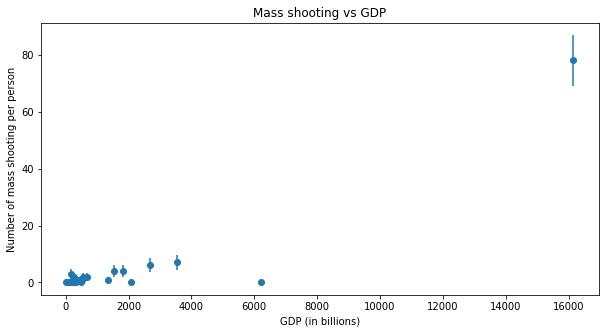

GDP (in billions) vs Number of mass shooting per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [66]:
x = df.gdp / 1e9
y = df['Number of mass shootings']
x_label = "GDP (in billions)"
y_label = "Number of mass shooting per person"
title = "Mass shooting vs GDP"
error = True
yerr = np.sqrt(y * 1.0)
plot(x,y,x_label,y_label, title, error, yerr)

### Figure 4.1.2 : Mass shooting vs GDP per person

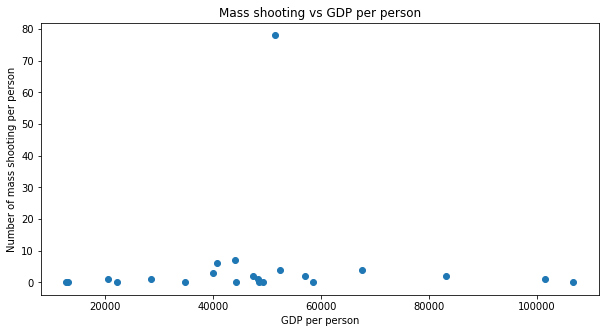

GDP per person vs Number of mass shooting per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [67]:
x = df.gdp / df["pop"]
y = df['Number of mass shootings']
x_label = "GDP per person"
y_label = "Number of mass shooting per person"
title = "Mass shooting vs GDP per person"
error = True
plot(x,y,x_label,y_label, title, error)

## 4.2 plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [68]:
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0


In [69]:
df['shootingspp'] = df["Average total all civilian firearms"] / df['pop'] * 1e3

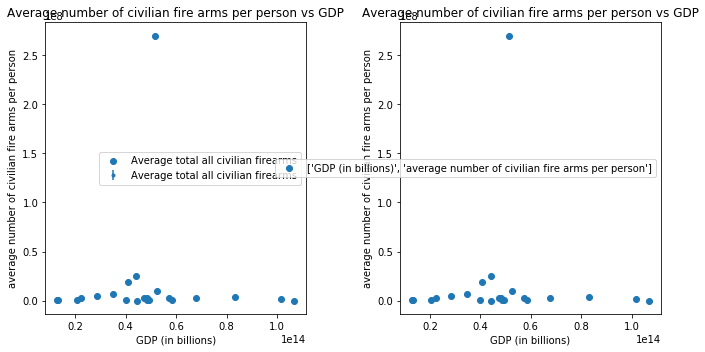

GDP (in billions) vs average number of civilian fire arms per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [85]:
x = df.gdp / df["pop"] * 1e9 
y = df["Average total all civilian firearms"]
per = df['pop'] * 1e3
title_name = "Average number of civilian fire arms per person vs GDP"
x_label = "GDP (in billions)"
y_label = "average number of civilian fire arms per person"
#error_plot(x,y,x_label,y_label)
Total_plot(x,y,x_label,y_label,title_name,per)

## 4.3 plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [75]:
df.head(3)
x = df.gdp/ 1e9
y = df["Number of homicides by firearm"] / df["pop"] * 1e6
title_name = "average number of homicide by fire arms per person"
x_label = "GDP (in billions)"
y_label = "average number of homicide by fire arms per person"

### Histogram

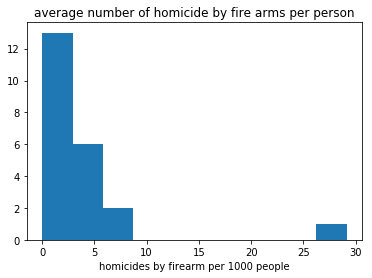

In [78]:
fig, ax = plt.subplots()
ax.hist(y)
ax.set_title(title_name)
#ax.legend()
ax.set_xlabel('homicides by firearm per 1000 people')

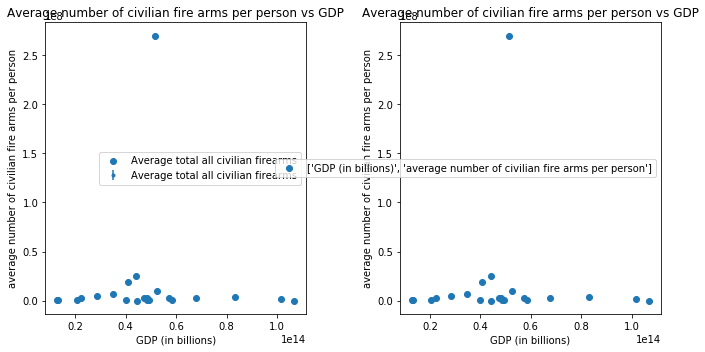

GDP (in billions) vs average number of civilian fire arms per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [86]:
Total_plot(x,y,x_label,y_label,title_name)

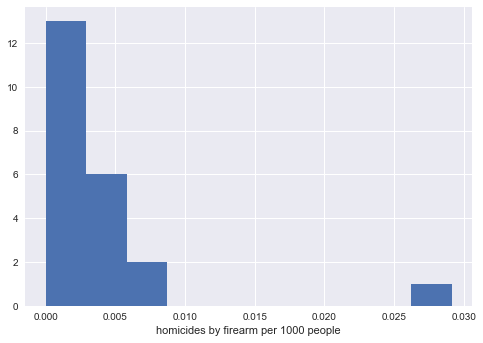

In [474]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


## 4.4 plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [80]:
df[df["gdp"] == df["gdp"].max()]

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop,shootingspp
21,United States,88.8,78,United States,9146.0,88.8,270000000.0,United States,1.61553e+13,1.61553e+13,313998379.0,859.877051


In [81]:
def Total_plot_US(x,y,xlabel,ylabel):
    fig = plt.figure(figsize=(10,5)) 
    ax = fig.add_subplot(121)

    scatter = ax.scatter(x , y)
    #plt.scatter(1,1,c="r")
    
    ax.errorbar(x , y, 
            yerr = np.sqrt(y * 1.0), fmt = '.')
    plt.scatter(x[df["Country"] =="United States"], y[df["Country"] == "United States"],label = "US",color = "r")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim()
    #plt.show()
    ax.legend()
    #fig = plt.figure(figsize=(10,5)) 
    ax_1 = fig.add_subplot(122)

    scatter = ax_1.scatter(x , y)
    plt.scatter(x[df["Country"] == "United States"],y[df["Country"] == "United States"],label = "US", color = "r")
    #ax.errorbar(x / 1e9, y, yerr = np.sqrt(y * 1.0), fmt = '.')
    ax_1.set_xlabel(x_label)
    ax_1.set_ylabel(y_label)
    ax_1.set_ylim()
    ax_1.legend()
    plt.tight_layout()
    plt.show()
    
    print ("{} vs {}, ".format(x_label,y_label) + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")
    

In [82]:
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop,shootingspp
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0,134.194206
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0,296.560222
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0,286.326445


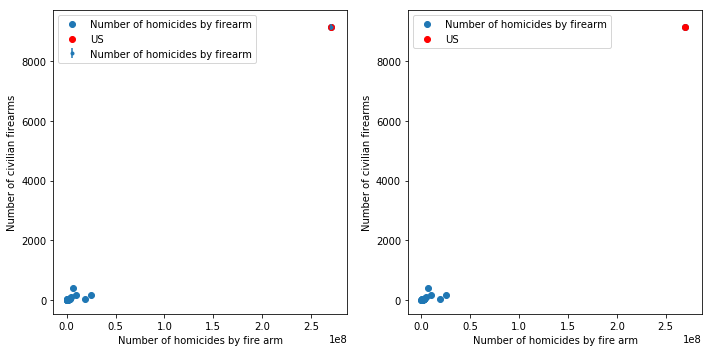

Number of homicides by fire arm vs Number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [87]:
df.head(3)
x = df["Average total all civilian firearms"]
y = df["Number of homicides by firearm"]
x_label = "Number of homicides by fire arm"
y_label = "Number of civilian firearms"
#error_plot(x, y, x_label, y_label)
Total_plot_US(x, y, x_label, y_label)

## 4.5 plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [41]:
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,gdp,pop,shootingspp
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,1.20462e+12,24127159.0,0.000166
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,3.86428e+11,8747358.0,0.000114
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,1.52976e+12,36286425.0,0.000110


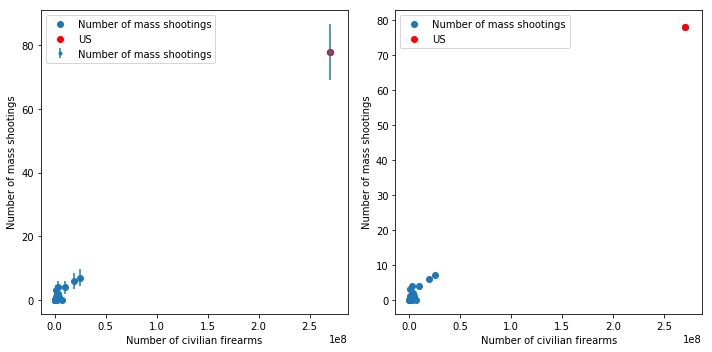

Number of civilian firearms vs Number of mass shootings, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [127]:
x = df["Average total all civilian firearms"]
y = df["Number of mass shootings"]
x_label = "Number of civilian firearms"
y_label = "Number of mass shootings"
#error_plot(x, y, x_label, y_label)
Total_plot_US(x, y, x_label, y_label)

# 5. Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [90]:
import seaborn as sns
import statsmodels.formula.api as smf
#sns.regplot(x="x", y="y", data=df)
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop,shootingspp
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0,134.194206
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0,296.560222
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0,286.326445


### 5.1 OLS
#### Number of mass shootings per person as a function of Average total all civilian firearms per person

In [92]:
df["Average_firearms_per_100_people"] = df["Average firearms per 100 people"]

In [100]:
lm_1 = smf.ols(formula='shootingspp ~ Average_firearms_per_100_people', data=df).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7369.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           3.72e-27
Time:                        13:58:21   Log-Likelihood:                -80.856
No. Observations:                  22   AIC:                             165.7
Df Residuals:                      20   BIC:                             167.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.9545      3.443     -0.858      0.401     -10.137       4.228
Average_firearms_per_100_people     9.6280      0.112     85.844      0.000       9.394       9.862
==============================================================================
Omnibus:                        0.093   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.145
Skew:                           0.116   Prob(JB):                        0.930
Kurtosis:                       2.678   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### WLS

In [102]:
lm_2 = smf.wls(formula='shootingspp ~ Average_firearms_per_100_people', data=df,weights=1/df["Average_firearms_per_100_people"]).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8958.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           5.31e-28
Time:                        13:58:31   Log-Likelihood:                -75.809
No. Observations:                  22   AIC:                             155.6
Df Residuals:                      20   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.1794      1.214      0.148      0.884      -2.354       2.713
Average_firearms_per_100_people     9.4979      0.100     94.647      0.000       9.289       9.707
==============================================================================
Omnibus:                        0.214   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.397
Skew:                           0.158   Prob(JB):                        0.820
Kurtosis:                       2.422   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Target Plot

In [106]:
df.head(3)

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,Number of homicides by firearm,Average firearms per 100 people,Average total all civilian firearms,Country Name,2012,gdp,pop,shootingspp,Average_firearms_per_100_people
0,Australia,15.0,4,Australia,30.0,15.0,3050000.0,Australia,1.53819e+12,1.53819e+12,22728254.0,134.194206,15.0
1,Austria,30.4,1,Austria,18.0,30.4,2500000.0,Austria,4.07452e+11,4.07452e+11,8429991.0,296.560222,30.4
2,Canada,30.8,4,Canada,173.0,30.8,9950000.0,Canada,1.82429e+12,1.82429e+12,34750545.0,286.326445,30.8


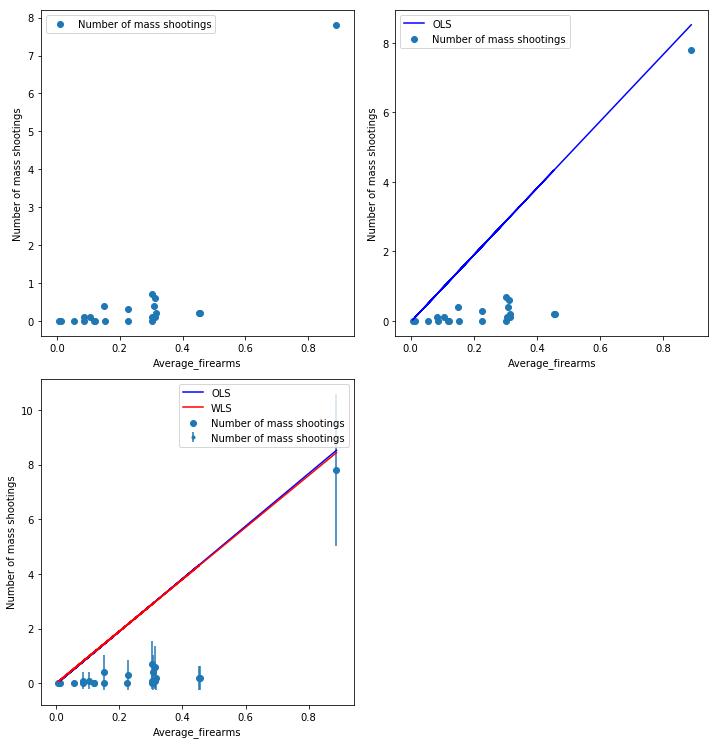

In [120]:
x = df["Average_firearms_per_100_people"]/100
y = df["Number of mass shootings"]/10
x_label = "Average_firearms"
y_label = "Number of mass shootings"

fig = plt.figure(figsize=(10,10)) 

ax_1 = fig.add_subplot(221)

scatter = ax_1.scatter(x , y)
    #ax.errorbar(x / 1e9, y, yerr = np.sqrt(y * 1.0), fmt = '.')
ax_1.set_xlabel(x_label)
ax_1.set_ylabel(y_label)
#ax_1.set_title(title_name)
ax_1.set_ylim()
ax_1.legend()
plt.tight_layout()
#plt.show()

ax_2 = fig.add_subplot(222)

scatter = ax_2.scatter(x , y)
ax_2.plot(df['Average_firearms_per_100_people']/100, lm_1.fittedvalues/100, 'b-', label='OLS') 
    #ax.errorbar(x / 1e9, y, yerr = np.sqrt(y * 1.0), fmt = '.')
ax_2.set_xlabel(x_label)
ax_2.set_ylabel(y_label)
#ax_1.set_title(title_name)
ax_2.set_ylim()
ax_2.legend()
plt.tight_layout()

ax = fig.add_subplot(223)

scatter = ax.scatter(x , y)
ax.errorbar(x , y, 
            yerr = np.sqrt(y * 1.0), fmt = '.')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.plot(df['Average_firearms_per_100_people']/100, lm_1.fittedvalues/100, 'b-', label='OLS') 
ax.plot(df['Average_firearms_per_100_people']/100, lm_2.fittedvalues/100, 'r-', label='WLS') 
#ax.set_title(title_name)
ax.set_ylim()
    #plt.show()
ax.legend()
    #fig = plt.figure(figsize=(10,5)) 
plt.show()


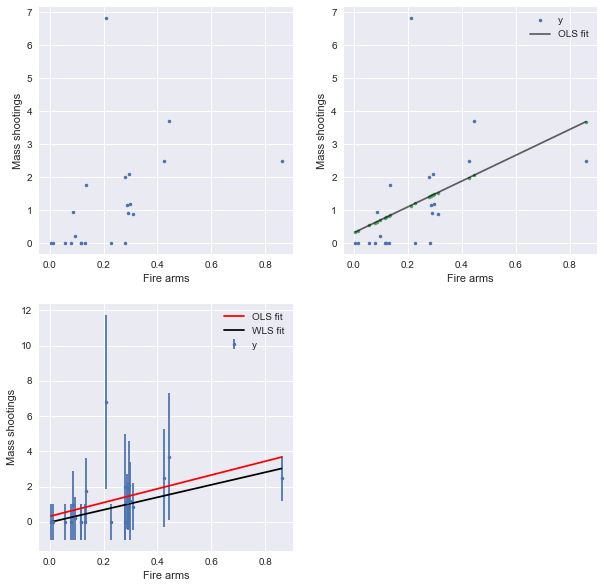

the plots should look something like this (not necessarily exactly, due to the choices of the error


## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



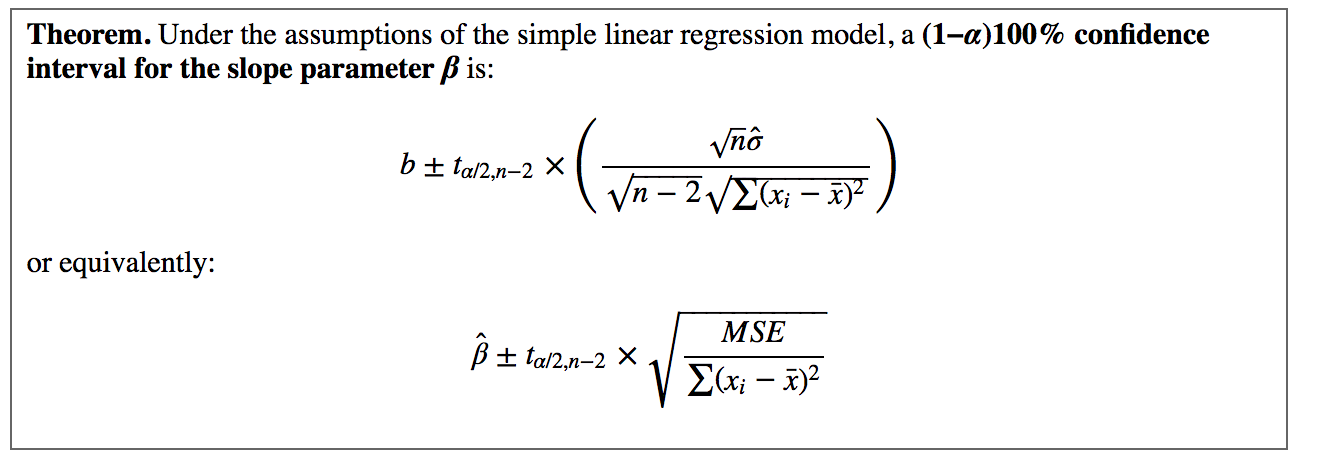

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

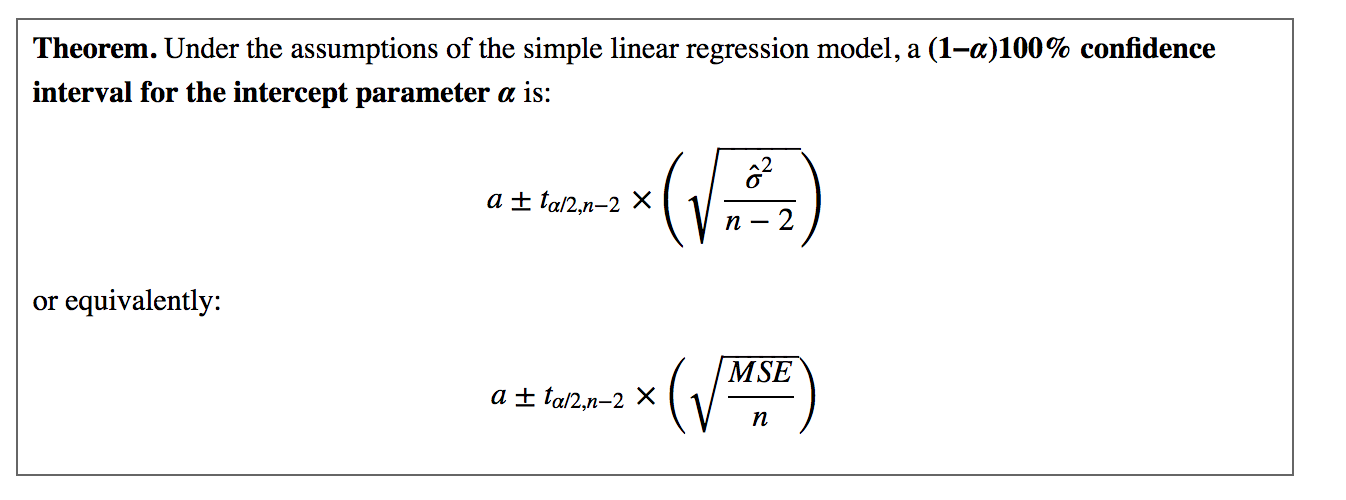

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

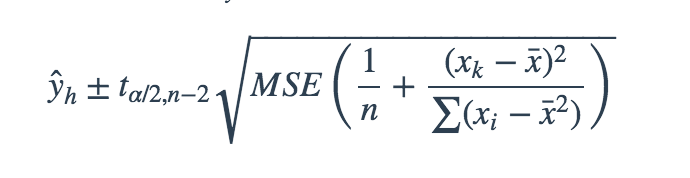

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

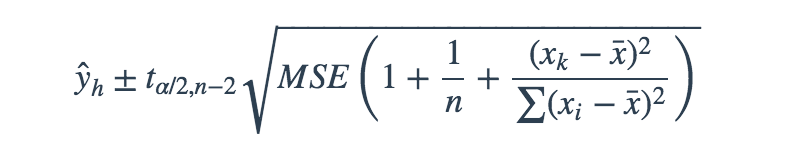

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

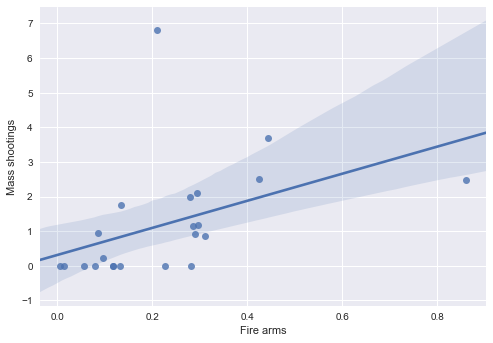

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

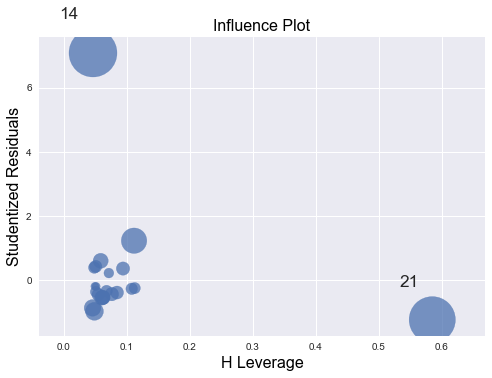

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings